# Big Data Processes - exercise no. 8
# <font color= green>Unsupervised learning</font>

#### <font color= red>Run in your anaconda (command) prompt</font>
pip install kneed

### 1. Importing various libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

### 2. Load and examine the data

In [ ]:
import pandas as pd
dataset = pd.read_csv('boat.csv', delimiter=',')
dataset.head()

Today, we are gonna work with the **boat** dataset.  It contains some facts about the passengers on a boat

In [ ]:
dataset.info()

## <font color= green>K-Means clustering</font>

**Why do you cluster**:
- Cluster analysis works to perform taxanomy description. this means that you find natural groups within the data not based on the variables, but based on the characteristica the data units share

**How K-Means clustering works**:
- You select the number of clusters that you want to identify in your data. This is the K in K-Means clustering (we want to create 3 clusters because there are three different Pclass values in the dataset)
- The centroid seeds for each cluster is randomly created based on random datapoints from the data. If you choose to create 3 clusters (K=3), 3 random centroid seeds will initially be created
- The distance is measured between the first datapoint and the three initial clusters. 
- The first datapoint is assigned to the nearest cluster
- Now we do the same thing for the next datapoint and continue this process until we have assigned all datapoints
- Then the mean of each cluster is calculated
- Then we measure and cluster again, but this time using the mean values as the centroid seeds
- The quality of the clusters are assessed by adding up the variation within each cluster. 
- KMeans keep track of the total variance within each cluster. 
- Then KMeans creates 3 new random centroid seeds based on random datapoints from the data. Calculate the mean of each cluster, reclusters based on the new mean etc.
- KMeans does this as many times as you tell it to. 

- **A video explaining K-means clustering:** https://www.youtube.com/watch?v=4b5d3muPQmA

### 3. Process the data for clustering

We apply the Standardscaler to scale the variables in the dataset so that they are evaluated to be same level of importance by the clustering algorithm. We scale only the features, but not the target

In [ ]:
X=dataset[['kwh','spendings','Fare','liters']]
y=dataset['Pclass'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

Let us take a look at what X_scaled looks like (always a good idea to print your variables to make sure that all the needed data is in the variable and that the variable is in the correct format)

In [ ]:
X_scaled.head()

Now we construct a for-loop testing the different values for k (number of clusters). We want to find the balance between the sum of squared distances to be as small as possible and creating as few clusters as possible

In [ ]:
Sum_of_squared_distances = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='random', n_init= 10, random_state=0)
    kmeans.fit(X_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)

- n_init= number of times the kmeans algorithm will run with different centroid seeds
- init = random: Means that algorithm choose n_clusters observations at random from data for the initial centroids

### 4. Find the optimal number of clusters

#### <font color= green>Elbow point</font>

We can visualize the relationship between amount of clusters and sum of squared distances in order to determine the elbow point visually

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 4))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), Sum_of_squared_distances)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum_of_squared_distances")
plt.show()

##### Question 1: 
Based on the graph, where is the elbow point?

In [ ]:
#if it is hard to determine the elbow point visually, we can get Jupyter to do it for us
kl = KneeLocator(range(1, 11), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow

#### <font color= green>The silhouette coefficient</font>

The silhouette coefficient measures how well a datapoint fits into its assigned cluster based on two factors:
- How close the datapoint is to the other points in the cluster
- How far the datapoint is from points in other clusters

In [ ]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init= 'random', n_init= 10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Question 2: 
We have three classes in the data. However, our models want us to have two classes when they analyze the data. What does that say about the data?

### 5. Evaluate the model

In [ ]:
# Check how well the model clusters the data through a visualization
kn=KMeans(n_clusters=2, random_state=0)
y_predicted= kn.fit_predict(X_scaled)
plt.scatter(X_scaled.iloc[:,0].values,X_scaled.iloc[:,1].values,c=y_predicted, cmap='rainbow')
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color='blue',marker='*')

#### <font color= green>**The adjusted rand index (ARI):**</font>
- ARI measures the similarity between true and predicted labels for each cluster.
- The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters

In [ ]:
ari_kmeans = adjusted_rand_score(y_predicted, y)
ari_kmeans

#### <font color= green>**V-measure:**</font>
- V-measure is the mean of homogeneity and completeness
- Homogeneity describes whether each cluster contains only members of a single class. 
- Completeness: all members of a given class are assigned to the same cluster

In [ ]:
from sklearn.metrics import v_measure_score
v_measure_score(y_predicted,y)

## <font color= green>Agglomerative clustering</font>

**Difference between KMeans clustering and hierarchical clustering:** KMeans tries to put the datapoints into the number of clusters that you tell it to. Hierarchical clustering tells you parwise what two datapoints are most similar

**How agglomerative clustering works**:

- Hierarchical clustering orders the rows based on similarity which makes it easy to see similiarities in the data
- The agglomerative clustering algorithm compares one row (one passenger on the boat/ on datapoint) to all other rows in the dataset to find what other row it is most similar to. It then turns these two rows into a cluster. Then it takes a third row and compares whether it is most similar to the created cluster or another row in the dataset. Then it either increases the size of the existing cluster or creates a new cluster. This is done for all rows in the data. 
- There are different ways to measure similarity. The two most common ways are euclidean and manhattan. For an explnation of the theory behind the two similarity metrics, see the video. Decide whether to use euclidean or manhattan based on which gives you the most insights into your data
- **A video explaining agglomerative clustering:** https://www.youtube.com/watch?v=4b5d3muPQmA

In [ ]:
#import the scipy library
import scipy.cluster.hierarchy as sch

We create the dendrogram in order to determine number of clusters

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('People on boat')
plt.ylabel('Euclidean distances')
plt.show()

- In contrast to the decision tree, you read the dendogram from the bottom going up. 
- **The Ward method** start with n clusters each containing one datapoint. Then it combines the clusters into new clusters based on achieving smallest possible variance within each cluster. Variance is measured through the sum of squares index. The clusters are combined to, in the end, make one cluster containing all the datapoints. 

Based on the dendogram, you can find the number of clusters by placing a horizontal rectangle with max height that does not cross any horizontal vertical dendogram line. 

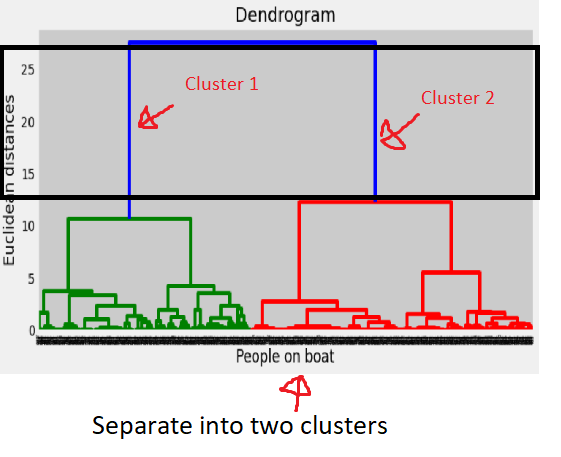

##### Question 3: 
How many clusters should we cluster the data into based on the dendrogram we have created for our data?

We import the agglomerative clustering algorithm and create an object from the algorithm's class

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
ag_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

We have now created an agglomerative clustering algorithm. We fit this algorithm on the X_scaled data and at the same time make it predict which cluster each person on the boat belongs to

In [ ]:
y_ag_clustering=ag_clustering.fit_predict(X_scaled)

we convert the X_scaled into values in order to plot them

In [ ]:
X_scaled_values=X_scaled.values

We plot the two clusters

In [ ]:
plt.scatter(X_scaled_values[y_ag_clustering==0, 0], X_scaled_values[y_ag_clustering==0, 1], s=50, marker='o', color='purple')
plt.scatter(X_scaled_values[y_ag_clustering==1, 0], X_scaled_values[y_ag_clustering==1, 1], s=50, marker='o', color='red')
#plt.scatter(X_scaled_values[y_ag_clustering==2, 0], X_scaled_values[y_ag_clustering==2, 1], s=50, marker='o', color='red')
plt.show()

## <font color= green>Principal Component Analysis (PCA)</font>

**purpose of PCA:** reduce the dimensionality of the data

**A video explaining the theory behind principal component analysis:** https://www.youtube.com/watch?v=FgakZw6K1QQ&t=204s

We make a new X and y because we have altered our X and y a lot through this notebook

In [ ]:
X2=dataset[['kwh','spendings','Fare','liters','kwh']]
y_PCA=dataset['Pclass'].values

We plot the cumulative explained variance ratio as a function of the number of components in order to determine how many components to reduce the features into through PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(dataset)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

##### Question 4: 
How many components would you reduce the data to?

Approximately 99 % of the variance within the data can be contained within two components. Consequently, we choose 2 components for our PCA

We import the PCA and make an object from the PCA class. We fit the PCA on X2 and reduce number of dimensions from 5 (amount of variables) to 2 (based on cumulative explained variance) 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X2)
X_PCA = pca.transform(X2)
print("original shape:   ", X2.shape)
print("transformed shape:", X_PCA.shape)

We can make a scree plot in order to determine how much of the variance is contained within each component

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

We can now plot the two principal components of each point

In [ ]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1],
            c=y_PCA, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

Remember what the components mean: the full data is 6-dimensional. The points in the visualization are the projection of each data point along the directions with the largest variance.

### Exercises: Apply the K-Means clustering, agglomerative clustering and PCA on your own dataset

## <font color = blue>Have a great day :-) 